## CS 678 Machine Learning

## Project 4: Kanyanee and Luke

The goal of this project is to write a program to detect the input features using Neural Network Learning. This project consists of 2 parts, A and B. Part A includes a program that uses a Perceptron to learn certain Boolean functions. Part B includes a program that implements a multi-layer neural network and demonstrates iterative learning. This project does not require any additional download for the dataset which was created at the beginning of the program. This project requires the following packages; Panda, Math, Mathplotlib, Numpy, and Random. The code descriptions are provided at the beginning of each code chunk, also as comments along with the code.

### Part A Learning a Linear Function via Perceptron

The separable two-input Boolean logic function of AND will be used to build the Part A program. Then, we will implement the rest of the Boolean functions using the program function that we created. 


**Inputs and output of Boolean logic functions**

|Inputs|AND|OR|NAND|NOR|
|-----|---|--|----|---|
|0, 0 |0  |0 |1   |1  |
|0, 1 |0  |1 |1   |0  |
|1, 0 |0  |1 |1   |0  |
|1, 1 |1  |1 |0   |0  |

Import the necessary packages

In [1]:
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random

Create the datasets

In [2]:
# Create the datasets
AND_data = pd.DataFrame(np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]]))
AND_data

,0,1,2
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


Set the number of epochs and the learning rate

In [3]:
num_epochs = 11
learning_rate = 0.75

Create a function that randomly creates the initial weights for the input values and the bias based on the size of the inputted dataset.

In [4]:
def rand_weights(data, target=0):
    # Retrieve the columns that are used for input values
    input_data = data.drop(data.columns[target], axis=1)
    
    # Randomly intialize the weights
    weights_list = []
    for i in range(0,len(input_data.columns)+1):
            weight = random.uniform(-1,1)
            weights_list.append(weight)
    return(weights_list)

In [5]:
# Randomly assign inital weights between -0.1 and 0.1
initial_weights = rand_weights(AND_data, 2)
print(initial_weights)

[0.008906320305941406, -0.18662207511040685, -0.025718332494270912]


Function that creates the Perceptron

In [6]:
def Perceptron(data, weights, target=0,):
    # Retrieve the columns that are used for input values
    input_data = data.drop(data.columns[target], axis=1)
    
    # Instantiate a list that keeps track of the predicted values.
    pred_list = []
    
    # We want to make a copy so doesn't change the initial weights values, but it will return the new adjusted weight values
    curr_weights = weights.copy()
    
    # Go through each value of the row for each column
    for index, row in input_data.iterrows():
        
        # Store and reset the row sum after each instance
        row_sum = 0
        
        # For the first index we do not want to update weights first
        if(index == 0):
            # Grabs each individual row value
            for i in range(0,len(row)):
                # Current value of the column with its row value multiplied by its weight from the intial weight list
                curr_val = row[i]*curr_weights[i]
                # Adds the current row sum value with the current value
                row_sum += curr_val            
        else:
            for j in range(0,len(row)):
                # Calculate the new weight for the current row value
                curr_weights[j] = curr_weights[j] + (learning_rate*(data[target][index-1] - pred_list[index-1])*data[j][index-1])
                # Only want to adjust the bias weight once
                if(j==0):
                    # Calculate the bias weight
                    curr_weights[-1] = curr_weights[-1] + (learning_rate*(data[target][index-1] - pred_list[index-1])*1)
                                # Current value of the column with its row value multiplied by its weight from the intial weight list
                curr_val = row[j]*curr_weights[j]
                # Adds the current row sum value with the current value
                row_sum += curr_val
                
        # Classify the prediction as 0 or 1 depending on the row sum value.
        if(row_sum + (1*curr_weights[-1])>0):
            pred_list.append(1)
        else:
            pred_list.append(0)
    
    # Before we return the lists we need to make one more weight adjustment for the last prediction
    for l in range(0,len(input_data.columns)):
        # Calculate the new weight for the current row value
        curr_weights[l] = curr_weights[l] + (learning_rate*(data[target][index] - pred_list[index])*data[l][index])
        if(l==0):
            # Calculate the bias weight
            curr_weights[-1] = curr_weights[-1] + (learning_rate*(data[target][index] - pred_list[index])*1)  
        
    return(pred_list, curr_weights)           

Function that prints the output that we want.

In [7]:
def output(correct, total, epoch, target, weights, predictions):
    print('The number of epochs: ', epoch)
    print('Weights: ', weights)
    print('Predictions: ', predictions)
    print('Target: ', target)
    print('The perceptron guessed ', correct, ' correct out of ', total, ' total instances')
    print('\n')

Final Function that uses the previous functions together to create the final perceptron.

In [8]:
def classification(data, target=0):
    
    # Retrieve the columns that are used for input values
    input_data = data.drop(data.columns[target], axis=1)
    
    # Has the number of times the perceptron was correct out of the total
    correct = 0
    total = 0    
    
    # Initally run the first instance of the perceptron with the intial weights and assign the lists appropriately
    predictions, new_weights = Perceptron(data, initial_weights, target)
    
    # Go through the number of epochs
    for i in range(1,num_epochs):
        
        # Run the first epoch with the initial weights
        if(i==1):
            
            for j in range(0,len(predictions)):
                if(predictions[j]==data[target][j]):
                    correct += 1
                    total += 1
                else:
                    total += 1
                
            if(correct == total):
                output(correct, total, i, data[target].tolist(), initial_weights, predictions)
                break
            else:
                output(correct, total, i, data[target].tolist(), initial_weights, predictions)
                
        # Run the perceptron function with the new adjusted weights       
        else:
            correct = 0
            total = 0
            
            # Retrieve the predictions of the Perceptron
            predictions, new_weights = Perceptron(data, new_weights, target)
            
            # Calculate the amount of correct predictions
            for j in range(0,len(predictions)):
                if(predictions[j]==data[target][j]):
                    correct += 1
                    total += 1
                else:
                    total += 1
                    
            if(correct == total):
                output(correct, total, i, data[target].tolist(), new_weights, predictions)
                break
            else:
                output(correct, total, i, data[target].tolist(), new_weights, predictions)

In [9]:
# Run the classification function that has the perceptron and output functions
classification(AND_data, 2)

The number of epochs:  1
Weights:  [0.008906320305941406, -0.18662207511040685, -0.025718332494270912]
Predictions:  [0, 0, 0, 0]
Target:  [0, 0, 0, 1]
The perceptron guessed  3  correct out of  4  total instances


The number of epochs:  2
Weights:  [1.5089063203059414, 0.5633779248895932, -0.025718332494270912]
Predictions:  [1, 1, 0, 0]
Target:  [0, 0, 0, 1]
The perceptron guessed  1  correct out of  4  total instances


The number of epochs:  3
Weights:  [1.5089063203059414, 0.5633779248895932, -0.7757183324942709]
Predictions:  [0, 1, 1, 0]
Target:  [0, 0, 0, 1]
The perceptron guessed  1  correct out of  4  total instances


The number of epochs:  4
Weights:  [1.5089063203059414, 1.3133779248895932, -0.7757183324942709]
Predictions:  [0, 0, 1, 0]
Target:  [0, 0, 0, 1]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  5
Weights:  [1.5089063203059414, 0.5633779248895932, -1.525718332494271]
Predictions:  [0, 1, 0, 1]
Target:  [0, 0, 0, 1]
The per

### Implementation

The code above is capable of learning any separable two-input Boolean function such as AND, OR, NAND, and NOR. To use the program, the data input has to be stated and use the classification function to create the perceptron.

#### OR Function

In [10]:
OR_data = pd.DataFrame(np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]]))
classification(OR_data, 2)

The number of epochs:  1
Weights:  [0.008906320305941406, -0.18662207511040685, -0.025718332494270912]
Predictions:  [0, 0, 1, 1]
Target:  [0, 1, 1, 1]
The perceptron guessed  3  correct out of  4  total instances


The number of epochs:  2
Weights:  [0.7589063203059414, 0.5633779248895932, 0.7242816675057291]
Predictions:  [1, 1, 0, 1]
Target:  [0, 1, 1, 1]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  3
Weights:  [0.7589063203059414, 0.5633779248895932, -0.025718332494270912]
Predictions:  [1, 1, 1, 1]
Target:  [0, 1, 1, 1]
The perceptron guessed  3  correct out of  4  total instances


The number of epochs:  4
Weights:  [0.7589063203059414, 0.5633779248895932, -0.025718332494270912]
Predictions:  [0, 1, 1, 1]
Target:  [0, 1, 1, 1]
The perceptron guessed  4  correct out of  4  total instances




#### NOT-AND (NAND) Fuction

In [11]:
NAND_data = pd.DataFrame(np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,0]]))
classification(NAND_data, 2)

The number of epochs:  1
Weights:  [0.008906320305941406, -0.18662207511040685, -0.025718332494270912]
Predictions:  [0, 1, 1, 1]
Target:  [1, 1, 1, 0]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  2
Weights:  [-1.4910936796940586, -0.9366220751104068, 0.7242816675057291]
Predictions:  [0, 0, 1, 1]
Target:  [1, 1, 1, 0]
The perceptron guessed  1  correct out of  4  total instances


The number of epochs:  3
Weights:  [-1.4910936796940586, -0.9366220751104068, 1.4742816675057293]
Predictions:  [1, 0, 0, 1]
Target:  [1, 1, 1, 0]
The perceptron guessed  1  correct out of  4  total instances


The number of epochs:  4
Weights:  [-1.4910936796940586, -1.6866220751104068, 1.4742816675057293]
Predictions:  [1, 1, 0, 1]
Target:  [1, 1, 1, 0]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  5
Weights:  [-1.4910936796940586, -0.9366220751104068, 2.2242816675057293]
Predictions:  [1, 0, 1, 0]
Target:  [1, 1, 1, 0]
The 

#### NOR Fuction

In [12]:
NOR_data = pd.DataFrame(np.array([[0,0,1],[0,1,0],[1,0,0],[1,1,0]]))
classification(NOR_data, 2)

The number of epochs:  1
Weights:  [0.008906320305941406, -0.18662207511040685, -0.025718332494270912]
Predictions:  [0, 1, 0, 0]
Target:  [1, 0, 0, 0]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  2
Weights:  [-0.7410936796940586, -0.9366220751104068, -0.025718332494270912]
Predictions:  [0, 0, 1, 0]
Target:  [1, 0, 0, 0]
The perceptron guessed  2  correct out of  4  total instances


The number of epochs:  3
Weights:  [-0.7410936796940586, -0.9366220751104068, 0.7242816675057291]
Predictions:  [0, 0, 0, 0]
Target:  [1, 0, 0, 0]
The perceptron guessed  3  correct out of  4  total instances


The number of epochs:  4
Weights:  [-0.7410936796940586, -0.9366220751104068, 0.7242816675057291]
Predictions:  [1, 0, 0, 0]
Target:  [1, 0, 0, 0]
The perceptron guessed  4  correct out of  4  total instances




----

### Part B Backpropagation for Neural Network Learning

The data used in part B mimics the neural network in the backpropagation's class totorial as shown in the picture below. The multi-layer perceptron learning consists of 2 input units, 2 hidden layer perceptrons, and 1 output unit. The value of input $I_1$ is 0, the value of input $I_2$ is 1, and all bias values are 1. The target value is 1 and the learning factor is 0.5. The Part B program will process through 3 steps including feeding forward the inputs, backpropagating the errors, and updating weights.

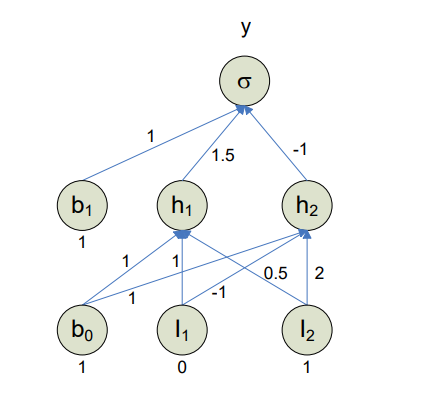

Create the array that has the inputs and target.

In [13]:
data = [0,1,1]

Set the learning factor and initial weights.

In [14]:
learning_factor = 0.5
initial_weights = {('I1'):[1,-1], 
                   ('I2'):[0.5,2],
                   ('H1'):1.5,
                   ('H2'):-1,
                   ('B1'):[1,1],
                   ('B2'):1}
print(initial_weights)

{'I1': [1, -1], 'I2': [0.5, 2], 'H1': 1.5, 'H2': -1, 'B1': [1, 1], 'B2': 1}


Function that feeds the inputs forward to calculate the values for the hidden layers, the predicted output and the total error.

In [15]:
def calc_errors(data, weights, target=0):
    # Make a copy of the dataset so the pop does not throw an error if we run the function multiple times
    data = data.copy()
    
    # Remove the target value from the data so we have the target and inputs separated
    target_val = data.pop(target)

    # Feed the input data into the hidden layers
    h1 = (weights['I1'][0] * data[0]) + (weights['I2'][0] * data[1]) + (weights['B1'][0]*1)
    h1 = 1/(1+math.exp(-h1))
    
    h2 = (weights['I1'][1] * data[0]) + (weights['I2'][1] * data[1]) + (weights['B1'][1]*1)
    h2 = 1/(1+math.exp(-h2))
    
    # Calculate the predicted output
    pred = (weights['H1'] * h1) + (weights['H2'] * h2) + (weights['B2']*1)
    pred = 1/(1+math.exp(-pred))
    
    # Calculate the total network error
    total_error = learning_factor*(1-pred)**2
    #print('The total network error: ', total_error)
    
    # Calculate the error for Y
    y_error = pred*(1-pred)*(target_val-pred)
    
    # Calculate the error for each hidden layer
    h1_error = h1*(1-h1)*(weights['H1']*y_error)
    h2_error = h2*(1-h2)*(weights['H2']*y_error)
    
    # Show the feed forward results
    print('\033[1m'+'\nFeed the input forward\n'+'\033[0m')
    print('  H1 = ', round(h1,3))
    print('  H2 = ', round(h2,3))
    print('  y  = ', round(pred,3))
    print('  The total network error = ', round(total_error,3))
    
    # Show the backpropagation results
    print('\033[1m'+'\nBackpropagate the errors\n'+'\033[0m')
    print('  The error for the output unit y  = ', round(y_error,3))
    print('  The error fot the hidden unit H1 = ', round(h1_error,3))
    print('  The error fot the hidden unit H2 = ', round(h2_error,3))
    
    # Return the output and errors of the hidden layers as well as the error for y
    return(h1, h2, h1_error, h2_error, y_error)

In [16]:
calc_errors(data, initial_weights, 2)


Feed the input forward

  H1 =  0.818
  H2 =  0.953
  y  =  0.781
  The total network error =  0.024

Backpropagate the errors

  The error for the output unit y  =  0.037
  The error fot the hidden unit H1 =  0.008
  The error fot the hidden unit H2 =  -0.002


(0.8175744761936437,
 0.9525741268224334,
 0.008354310462937586,
 -0.0016870212055845604,
 0.037342760966238966)

Function that updates the weights for the network.

In [17]:
def learn(data, weights):    
    # Make a copy of the dataset so the pop does not throw an error if we run the function multiple times
    data = data.copy()
    
    # Run the calc_errors function to get the necessary values
    h1_out, h2_out, h1_error, h2_error, y_error = calc_errors(data, weights, 2)

    # Update the weights for the inputs and bias for the first hidden layer
    weights['I1'][0] = weights['I1'][0] + learning_factor*(h1_error)*(weights['I1'][0]*data[0])
    weights['I2'][0] = weights['I2'][0] + learning_factor*(h1_error)*(weights['I2'][0]*data[1])
    weights['B1'][0] = weights['B1'][0] + learning_factor*(h1_error)*(weights['B1'][0]*1)
    
    # Update the weights for the inputs and bias for the second hidden layer
    weights['I1'][1] = weights['I1'][1] + learning_factor*(h2_error)*(weights['I1'][1]*data[0])
    weights['I2'][1] = weights['I2'][1] + learning_factor*(h2_error)*(weights['I2'][1]*data[1])
    weights['B1'][1] = weights['B1'][1] + learning_factor*(h2_error)*(weights['B1'][1]*1)
    
    # Update the weights for the hidden layers and the second bias
    weights['H1'] = weights['H1'] + learning_factor*y_error*h1_out
    weights['H2'] = weights['H2'] + learning_factor*y_error*h2_out
    weights['B2'] = weights['B2'] + learning_factor*y_error*1
    
    # Show the adjusted weights
    print('\033[1m'+'\nLearn\n'+'\033[0m')
    print('  W of H1, y = ', round(weights['H1'],3))
    print('  W of H2, y = ', round(weights['H2'],3))
    print('  W of B1, y = ', round(weights['B2'],3))
    
    print('\n  W of I1, H1 = ', round(weights['I1'][0],3))
    print('  W of I2, H1 = ', round(weights['I2'][0],3))
    print('  W of B0, H1 = ', round(weights['B1'][0],3))
    
    print('\n  W of I1, H2 = ', round(weights['I1'][1],3))
    print('  W of I2, H2 = ', round(weights['I2'][1],3))
    print('  W of B0, H2 = ', round(weights['B1'][1],3))
    
    # Return the adjusted weights
    return(weights)

Output from running the function with the input data.

In [18]:
weights = learn(data, initial_weights)


Feed the input forward

  H1 =  0.818
  H2 =  0.953
  y  =  0.781
  The total network error =  0.024

Backpropagate the errors

  The error for the output unit y  =  0.037
  The error fot the hidden unit H1 =  0.008
  The error fot the hidden unit H2 =  -0.002

Learn

  W of H1, y =  1.515
  W of H2, y =  -0.982
  W of B1, y =  1.019

  W of I1, H1 =  1.0
  W of I2, H1 =  0.502
  W of B0, H1 =  1.004

  W of I1, H2 =  -1.0
  W of I2, H2 =  1.998
  W of B0, H2 =  0.999


Running the function with the input data from Homework 10.

In [19]:
data = [0,1,1]
learn(data, weights)


Feed the input forward

  H1 =  0.819
  H2 =  0.952
  y  =  0.79
  The total network error =  0.022

Backpropagate the errors

  The error for the output unit y  =  0.035
  The error fot the hidden unit H1 =  0.008
  The error fot the hidden unit H2 =  -0.002

Learn

  W of H1, y =  1.53
  W of H2, y =  -0.966
  W of B1, y =  1.036

  W of I1, H1 =  1.0
  W of I2, H1 =  0.504
  W of B0, H1 =  1.008

  W of I1, H2 =  -1.0
  W of I2, H2 =  1.997
  W of B0, H2 =  0.998


{'I1': [1.0, -1.0],
 'I2': [0.5040614075409225, 1.9967616029062558],
 'H1': 1.5295529030146615,
 'H2': -0.9655882244903209,
 'B1': [1.008122815081845, 0.9983808014531279],
 'B2': 1.0361271342422749}

### Discussion

The results of Part A and Part B programs display diagnostic outputs that are identical to the class's tutorial and homework. Further work includes creating some visualizations to enhance the interpretation of the algorithms and the outputs. Pietro (2021) demonstrated a function to plot the structure of an Artificial Neural Network using Matplotlib to improve the story telling.

### Reference

* Pietro, M. D. (2021, December 17). Deep learning with python: Neural networks (complete tutorial). Medium. Retrieved April 1, 2022, from https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0 